In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('iris/Iris.csv')

y = df.iloc[0:100, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [1, 3]].values
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

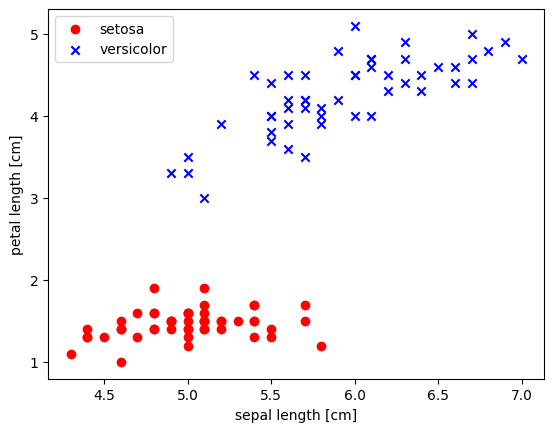

In [37]:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [92]:
class Perceptron():
    def __init__(self, learning_rate=0.1, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = [-0.06, 0.05]
        self.bias = 0.16

    def train(self, X, y):
        self.errors = []
        for _ in range(self.epochs):
            errors = 0
            for inputs, label in zip(X, y):
                update = self.learning_rate * (label - self.predict(inputs))
                self.weights += update * inputs
                self.bias += update * 1
                errors += update!=0
            self.errors.append(errors)
        return self

    def calculate_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        return np.where(self.calculate_input(X) >= 0.0, 1, -1)





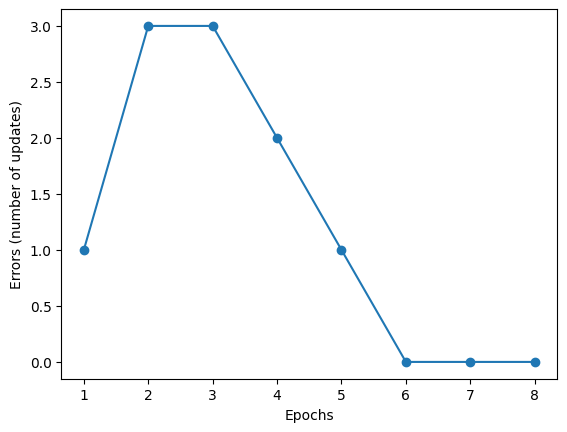

In [93]:
mini_brain = Perceptron(epochs=8)
mini_brain.train(X, y)
plt.plot(range(1, len(mini_brain.errors) + 1),
         mini_brain.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors (number of updates)')
plt.show()


#[-0.01749765  0.0034268   0.01153036]

#[-0.41749765 -0.6765732   1.83153036]

In [56]:
mini_brain.predict([5, 2.2])

array(1)